In [71]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [72]:
iris = load_iris()
x = iris.data
y = iris.target
print("Iris Dataset \n", x[:10])
print("Iris labels : \n", y[:10])
print(len(x))

Iris Dataset 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Iris labels : 
 [0 0 0 0 0 0 0 0 0 0]
150


# Normalize dataset (mean = 0 , std = 1)

In [73]:
# x_mean = np.mean(x, axis=0)
# x_std = np.std(x, axis=0)
# x_normalized = (x-x_mean) / x_std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


# Calculate Covariance Matrix

In [74]:
cov_matrix = np.cov(x_normalized, rowvar=False)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


# Calculate eigen values and eigen vectors

In [75]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigen Values of Cov Matrix : ", eigen_values)
print("Eigen Vectors of Cov Matrix", eigen_vectors)

Eigen Values of Cov Matrix :  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen Vectors of Cov Matrix [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


# Sorting eigen values in descending order

In [76]:
print(eigen_values[::-1])
sorted_indices = np.argsort(eigen_values[::-1])
print(sorted_indices)

[0.02085386 0.14774182 0.9201649  2.93808505]
[0 1 2 3]


In [77]:
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:, sorted_indices]
print(sorted_eigenvalues)
print(sorted_eigenvectors)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


# Select 2 componets for pca

In [78]:
n_components = 2
principal_components = sorted_eigenvectors[:, :n_components]
print(principal_components.shape)
print(x_normalized.shape)

(4, 2)
(150, 4)


# transform data

In [79]:
x_pca = np.dot(x_normalized, principal_components)
print(x_pca[:10])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]]


# Visualize data

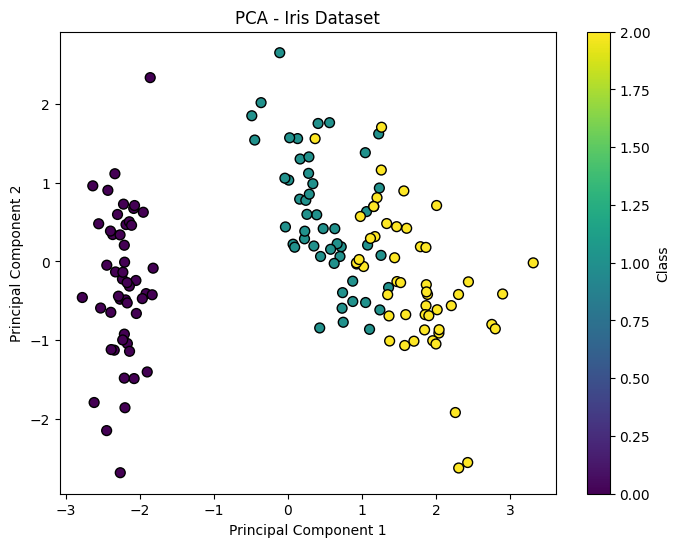

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class')
plt.show()

# Using PCA from Sklearn and comparing to result above

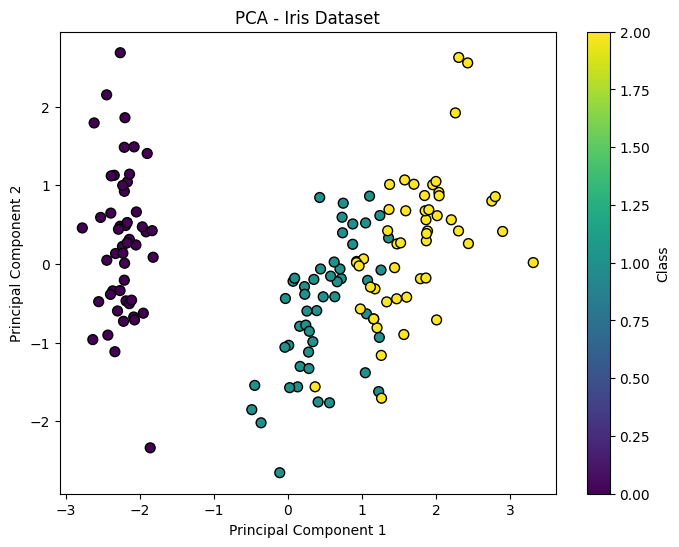

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_normalized_sklearn = scaler.fit_transform(x)

pca = PCA(n_components = n_components)

x_pca_sklearn = pca.fit_transform(x_normalized_sklearn)
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_sklearn[:, 0], x_pca_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class')
plt.show()


In [82]:
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_.T
print(eigenvalues_sklearn)
print(eigenvectors_sklearn)

[2.93808505 0.9201649 ]
[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


In [83]:
print(x_pca_sklearn[:5])
print(x_pca[:5])

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


In [84]:
print(x_pca_sklearn[:5] - x_pca[:5])

[[ 2.66453526e-15  9.60053193e-01]
 [ 2.22044605e-15 -1.34826711e+00]
 [ 2.66453526e-15 -6.83816048e-01]
 [ 2.22044605e-15 -1.19478902e+00]
 [ 2.66453526e-15  1.29367077e+00]]


In [86]:
print(x_normalized_sklearn[:5])
print(x_normalized[:5])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
